## Setup: Downloading and Loading the Data

### Import necessary libraries and load the dataset

file_path ='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'


### Display the first few rows of the data to understand its structure


### Task 1: Stacked Chart for Composition of Job Satisfaction Across Age Groups


##### 1. Stacked Chart of Median `JobSatPoints_6` and `JobSatPoints_7` for Different Age Groups


Visualize the composition of job satisfaction scores (`JobSatPoints_6` and `JobSatPoints_7`) across various age groups. This will help in understanding the breakdown of satisfaction levels across different demographics.



##### Stacked Chart of `JobSatPoints_6` and `JobSatPoints_7` for Employment Status


Create a stacked chart to compare job satisfaction (`JobSatPoints_6` and `JobSatPoints_7`) across different employment statuses. This will show how satisfaction varies by employment type.


### Task 2: Stacked Chart for Compensation and Job Satisfaction by Age Group


##### This stacked chart visualizes the composition of compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) specifically for respondents aged 30-35.


##### Stacked Chart of Median Compensation and Job Satisfaction Across Age Group


Compare the median compensation and job satisfaction metrics across different age groups. This helps visualize how compensation and satisfaction levels differ by age.


### Task 3: Comparing Data Using Stacked Charts


##### 1. Stacked Chart of Preferred Databases by Age Group




Visualize the top databases that respondents from different age groups wish to learn. Create a stacked chart to show the proportion of each database in each age group.


##### 2. Stacked Chart of Employment Type by Job Satisfaction


Analyze the distribution of employment types within each job satisfaction level using a stacked chart. This will provide insights into how employment types are distributed across various satisfaction ratings.


### Task 4: Exploring Technology Preferences Using Stacked Charts


##### 1. Stacked Chart for Preferred Programming Languages by Age Group


Analyze how programming language preferences (`LanguageAdmired`) vary across age groups.


##### 2. Stacked Chart for Technology Adoption by Employment Type


Explore how admired platforms (`PlatformAdmired`) differ across employment types (e.g., full-time, freelance)


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

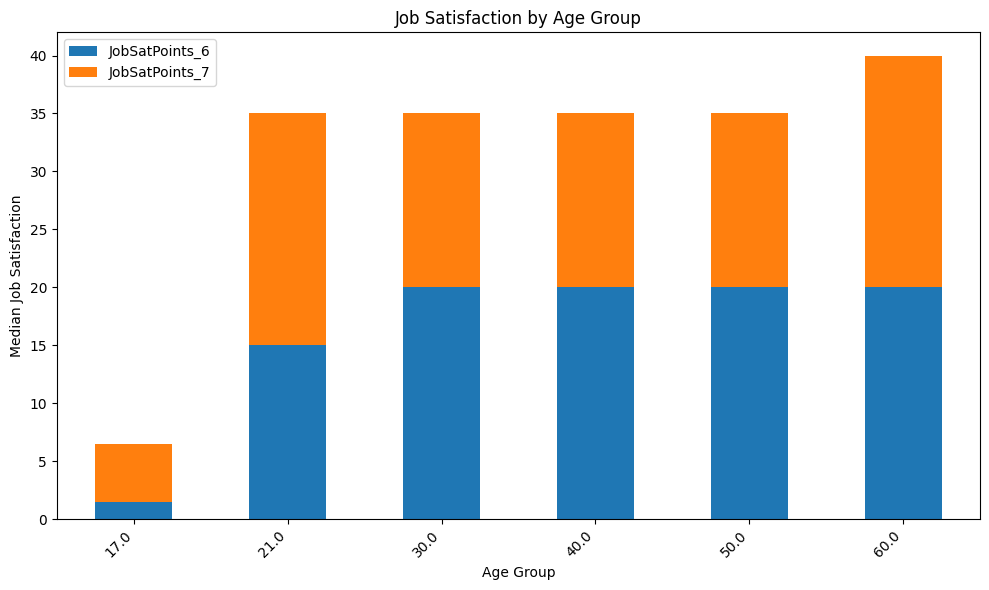

C:\Users\tdhoa\AppData\Local\Temp\ipykernel_13688\312833922.py:37: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


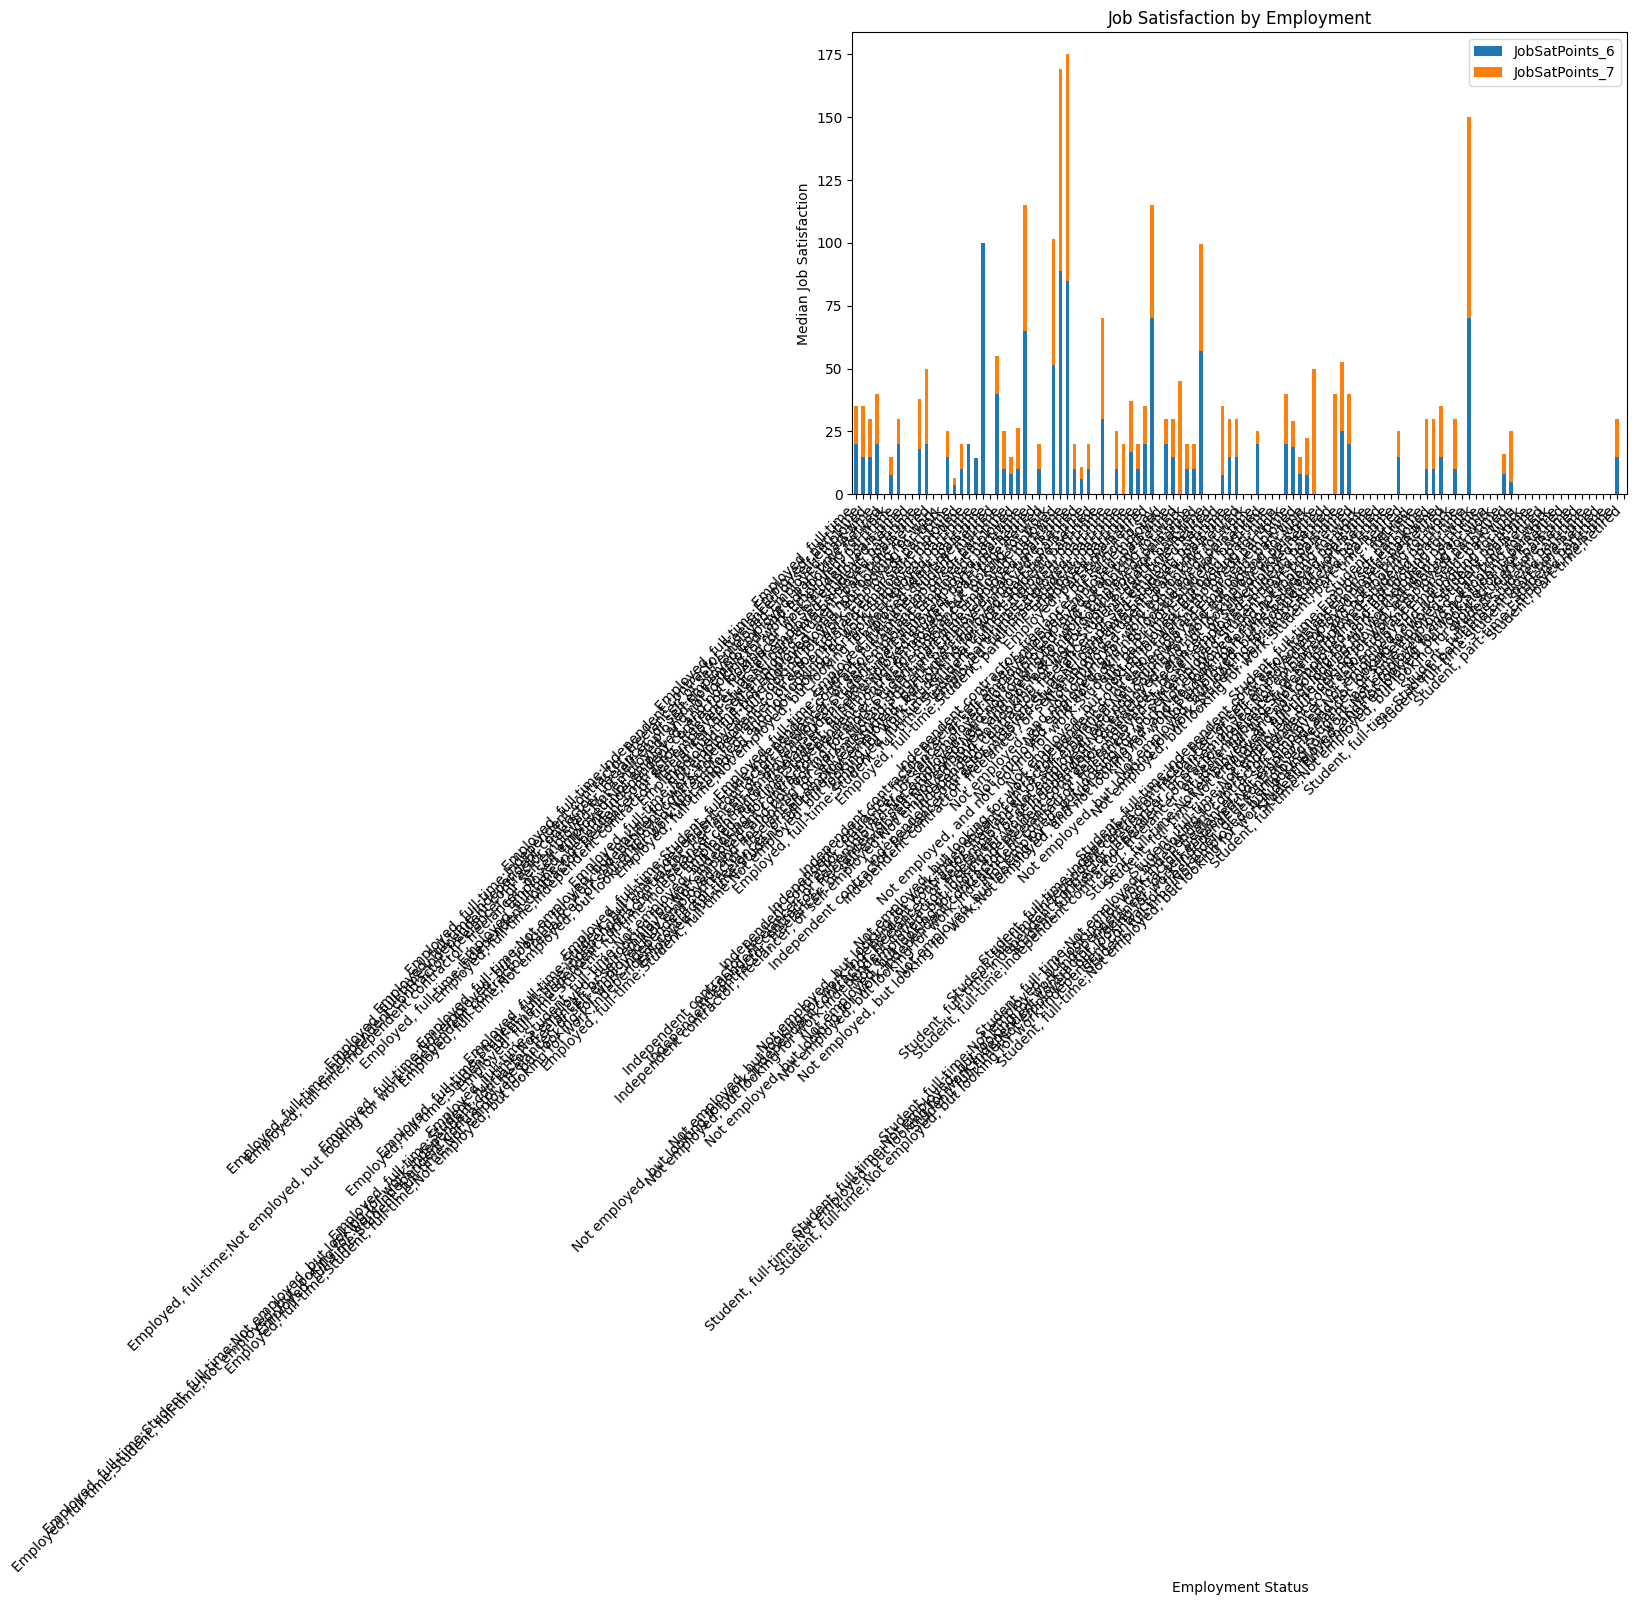

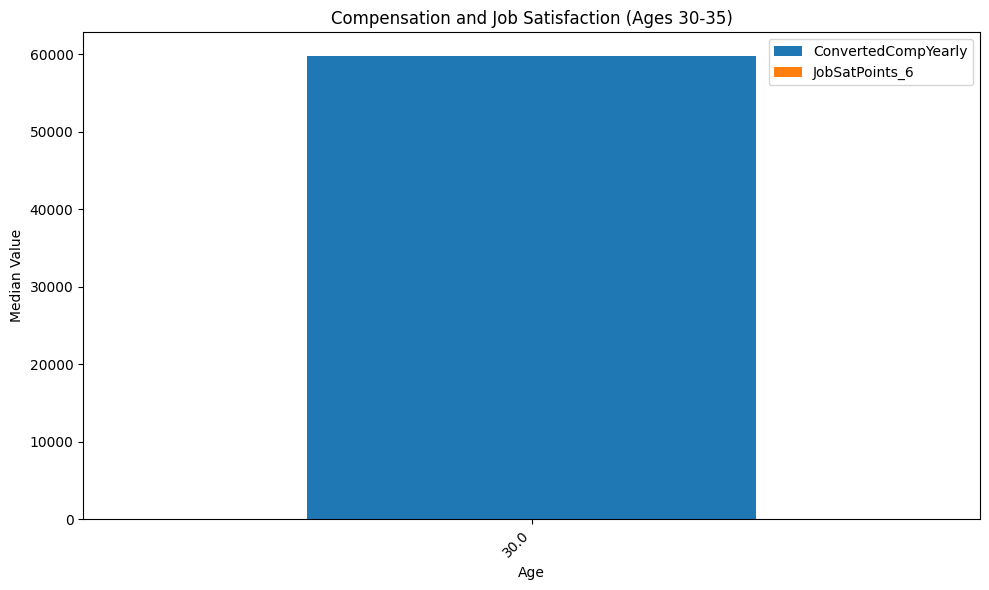

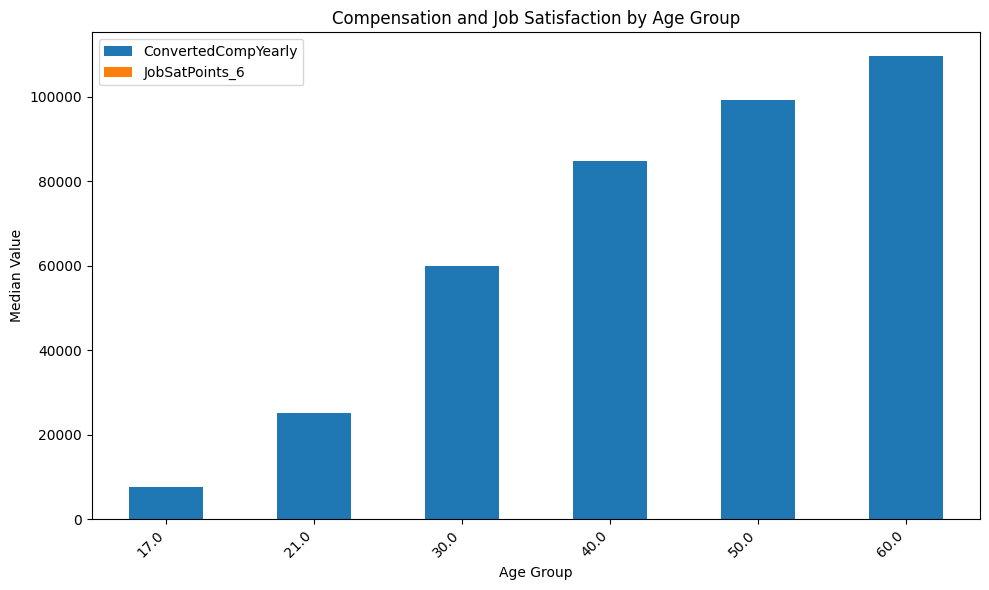

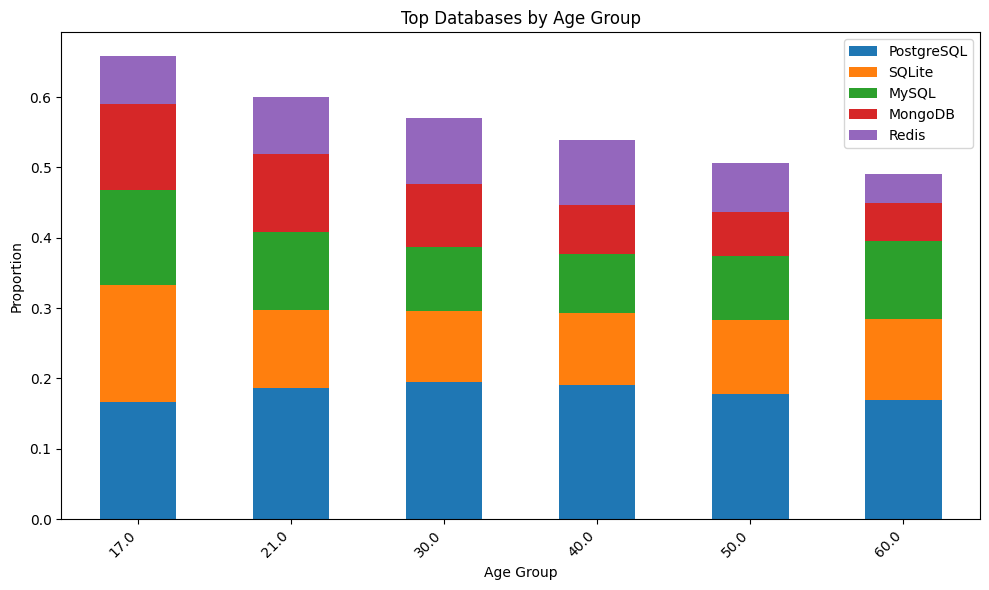

C:\Users\tdhoa\AppData\Local\Temp\ipykernel_13688\312833922.py:37: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


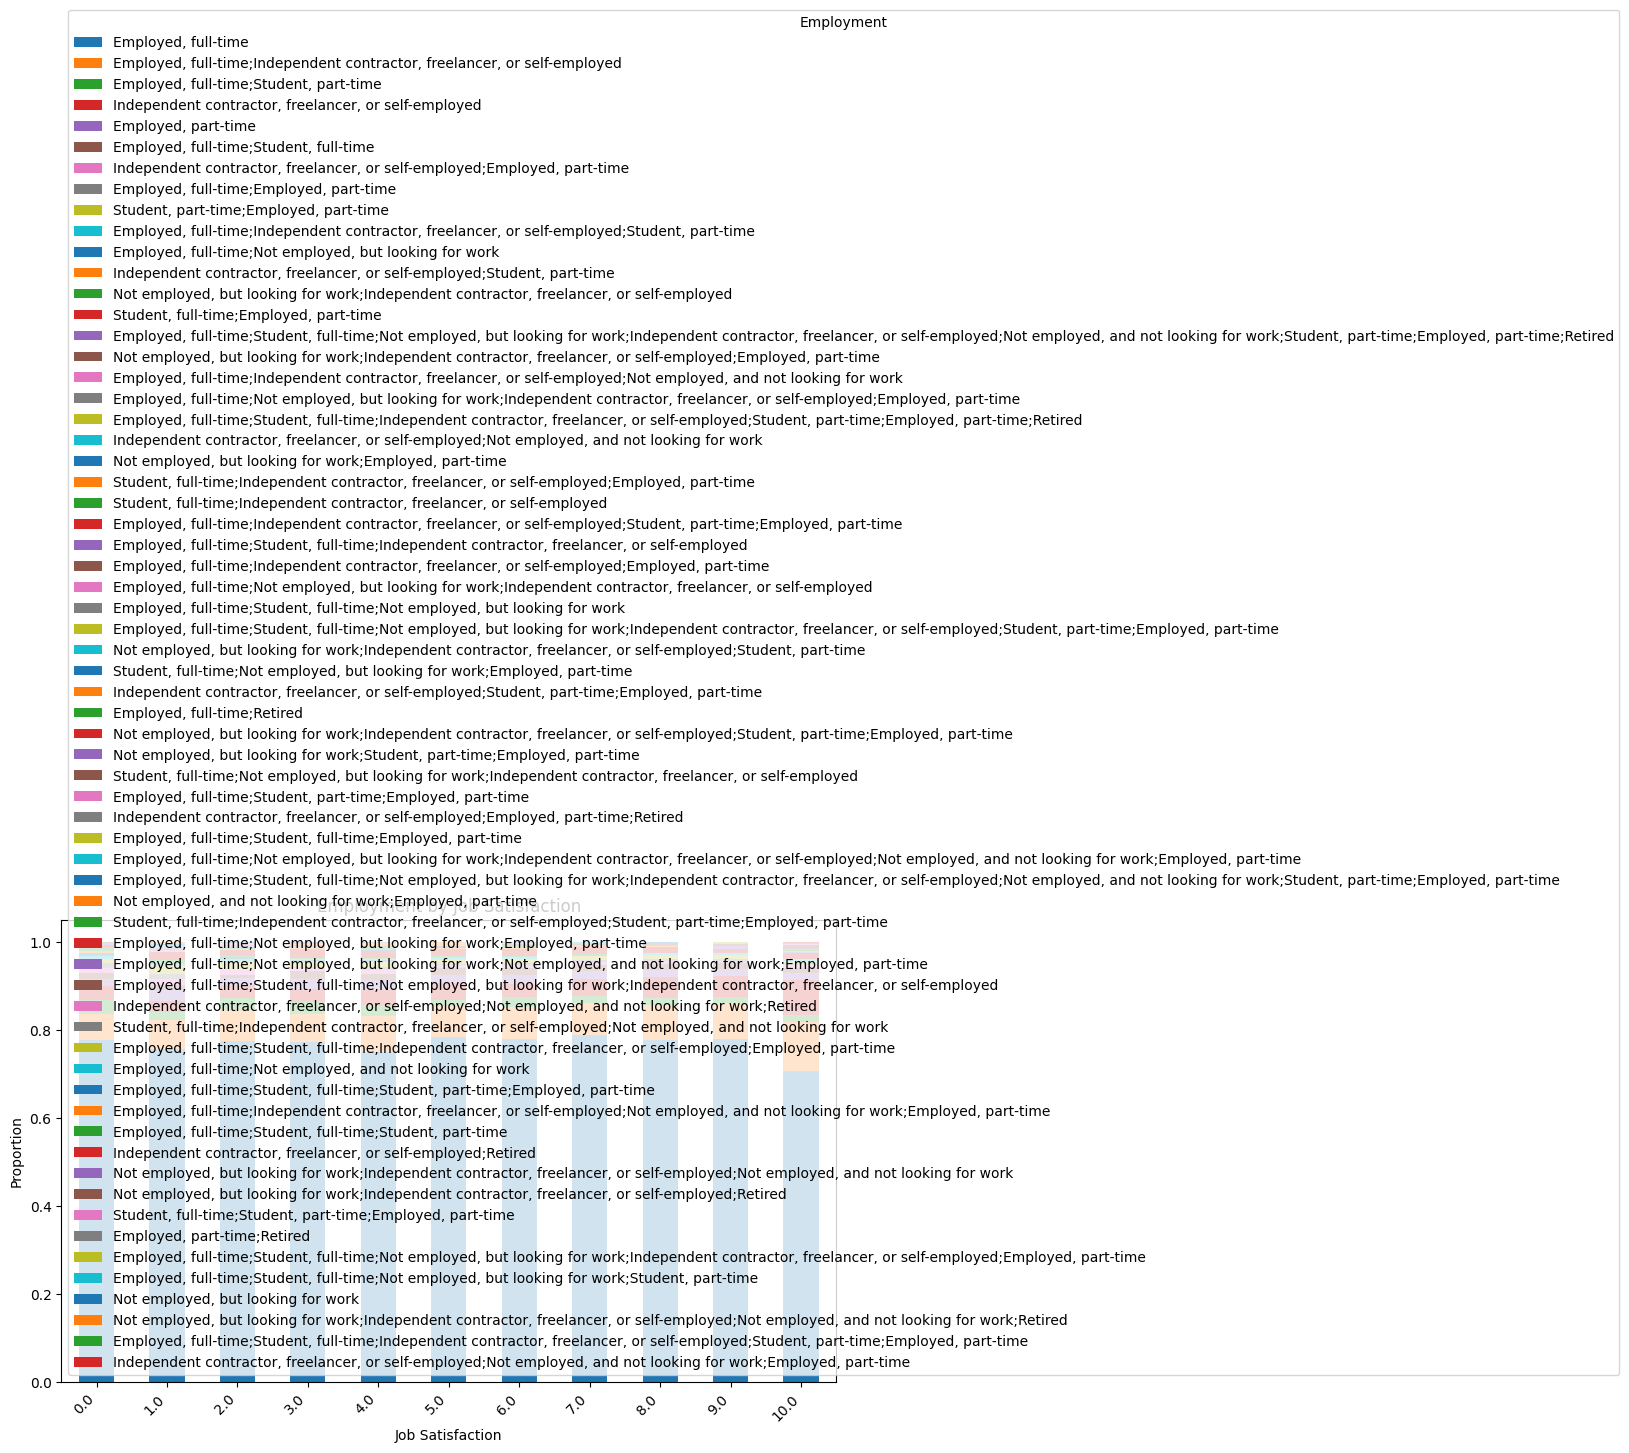

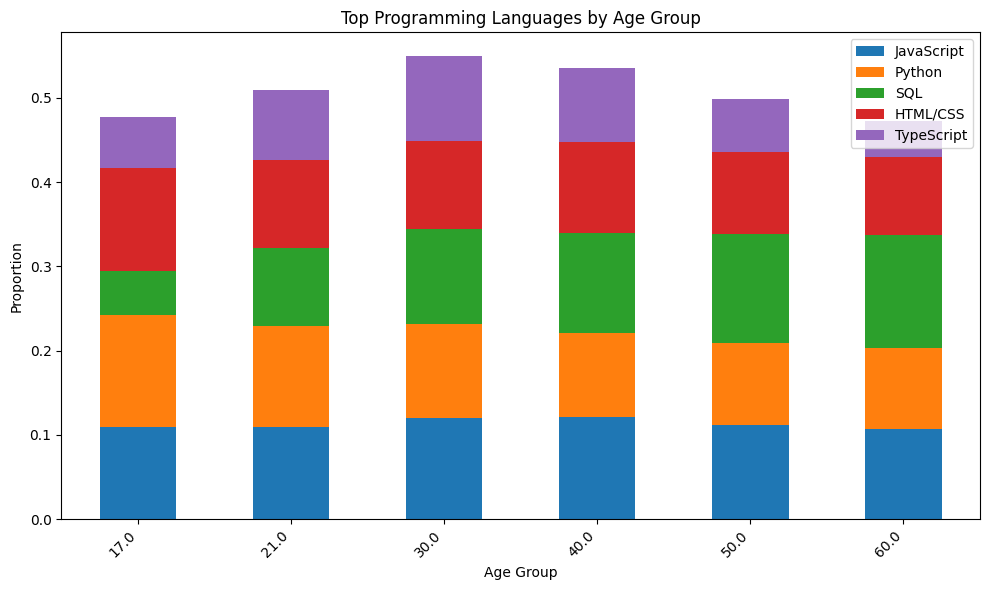

C:\Users\tdhoa\AppData\Local\Temp\ipykernel_13688\312833922.py:37: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


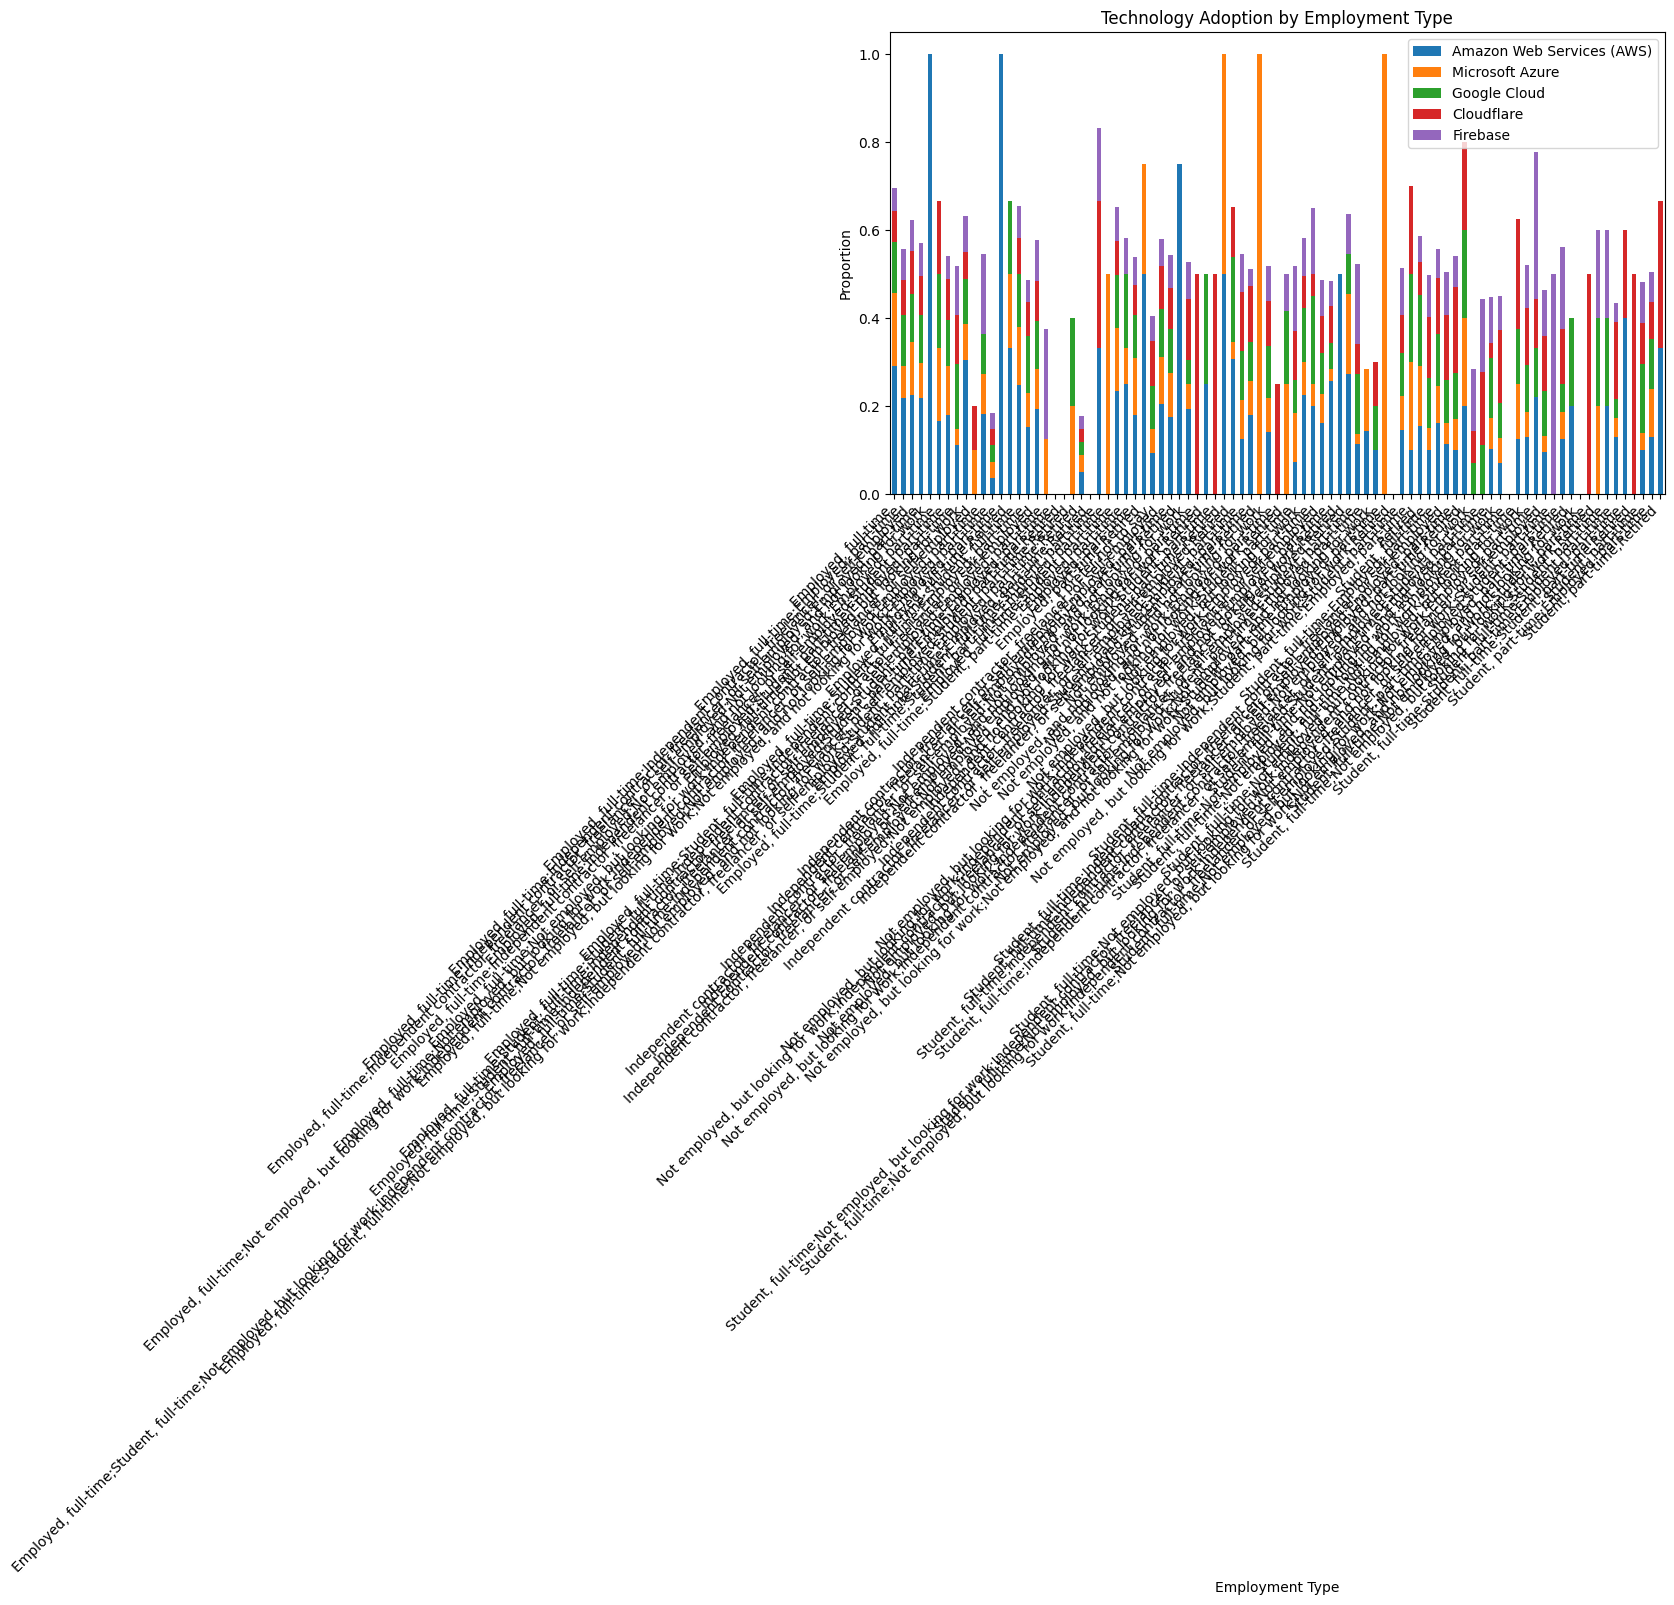

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


def load_and_preprocess_data(file_path):
    """Loads and preprocesses the data."""
    df = pd.read_csv(file_path)
    
    # Convert age to numeric
    age_mapping = {
        'Under 18 years old': 17,
        '18-24 years old': 21,  # Example: midpoint
        '25-34 years old': 30,
        '35-44 years old': 40,
        '45-54 years old': 50,
        '55-64 years old': 60,
        '65-74 years old': 70,
        '75 years or older': 75,
        'Prefer not to say': None 
    }
    df['AgeNumeric'] = df['Age'].map(age_mapping)

    # Convert relevant columns to numeric (handle errors)
    for col in ['JobSatPoints_6', 'JobSatPoints_7', 'ConvertedCompYearly', 'JobSat']:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    return df


def create_stacked_chart(data, title, xlabel, ylabel):
    """Creates a stacked chart."""
    data.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Load and preprocess data
file_path ='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = load_and_preprocess_data(file_path)

# Display first few rows
print(df.head())


# Task 1: Job Satisfaction Composition
# 1. Stacked chart by age group
age_jobsat = df.groupby('AgeNumeric')[['JobSatPoints_6', 'JobSatPoints_7']].median()
create_stacked_chart(age_jobsat, 'Job Satisfaction by Age Group', 'Age Group', 'Median Job Satisfaction')



# 2. Stacked chart by employment
emp_jobsat = df.groupby('Employment')[['JobSatPoints_6', 'JobSatPoints_7']].median()
create_stacked_chart(emp_jobsat, 'Job Satisfaction by Employment', 'Employment Status', 'Median Job Satisfaction')





# Task 2: Compensation and Job Satisfaction
# 1. Stacked chart for ages 30-35
age_30_35 = df[(df['AgeNumeric'] >= 30) & (df['AgeNumeric'] <= 35)]
age30_35_comp_sat = age_30_35.groupby('AgeNumeric')[['ConvertedCompYearly', 'JobSatPoints_6']].median()

create_stacked_chart(age30_35_comp_sat, 'Compensation and Job Satisfaction (Ages 30-35)', 'Age', 'Median Value')


# 2. Stacked chart across age groups
age_comp_sat = df.groupby('AgeNumeric')[['ConvertedCompYearly', 'JobSatPoints_6']].median()
create_stacked_chart(age_comp_sat,'Compensation and Job Satisfaction by Age Group','Age Group', 'Median Value')



# Task 3: Comparing Data
# 1. Preferred Databases by Age Group (Top 5)
top_databases = df['DatabaseWantToWorkWith'].str.split(';', expand=True).stack().value_counts().nlargest(5).index
database_by_age = df.groupby('AgeNumeric')['DatabaseWantToWorkWith'].apply(lambda x: x.str.split(';', expand=True).stack().value_counts(normalize=True)).unstack(fill_value=0)[top_databases]

create_stacked_chart(database_by_age, 'Top Databases by Age Group', 'Age Group', 'Proportion')


# 2. Employment Type by Job Satisfaction
emp_by_jobsat = df.groupby('JobSat')['Employment'].value_counts(normalize=True).unstack(fill_value=0) # Stacked bar chart (normalized)
create_stacked_chart(emp_by_jobsat, 'Employment by Job Satisfaction','Job Satisfaction','Proportion')





# Task 4: Technology Preferences
# 1. Preferred Programming Languages by Age Group (Top 5)
top_languages = df['LanguageAdmired'].str.split(';', expand=True).stack().value_counts().nlargest(5).index
languages_by_age = df.groupby('AgeNumeric')['LanguageAdmired'].apply(
    lambda x: x.str.split(';', expand=True).stack().value_counts(normalize=True)).unstack(fill_value=0)[top_languages]

create_stacked_chart(languages_by_age, 'Top Programming Languages by Age Group', 'Age Group', 'Proportion')



# 2. Technology Adoption by Employment Type (Top 5 Platforms)
top_platforms = df['PlatformAdmired'].str.split(';', expand=True).stack().value_counts().nlargest(5).index
platforms_by_emp = df.groupby('Employment')['PlatformAdmired'].apply(lambda x: x.str.split(';',expand=True).stack().value_counts(normalize=True)).unstack(fill_value=0)[top_platforms]
create_stacked_chart(platforms_by_emp, 'Technology Adoption by Employment Type', 'Employment Type', 'Proportion')